In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('DataFrame.csv') #Zeitreihen externe Variablen nur bis Mai 2024 daher filtern

In [23]:
df

,Datum,Merkmal,Merkmalwert,Bestätigte Menge,Relativer Anteil,USTR10Y,WeizenSpot,CornSpot,GER10Y,WtiOilSpot,SoySpot,AgriSpot
0,2014-01-01,B10,30,0,0.000000,3.006,197.738,187.924,1.941,98.04,246.732,200.399
1,2014-02-01,B10,30,0,0.000000,2.582,182.795,190.254,1.647,96.43,246.293,201.583
2,2014-03-01,B10,30,0,0.000000,2.608,204.039,200.847,1.563,104.92,269.561,221.079
3,2014-04-01,B10,30,48,0.125654,2.755,222.170,215.466,1.581,99.74,281.258,233.772
4,2014-05-01,B10,30,42,0.156134,2.613,241.438,212.924,1.470,99.42,242.195,236.510
...,...,...,...,...,...,...,...,...,...,...,...,...
17851,2023-10-01,P02,2078,0,0.000000,4.687,198.708,217.797,2.911,88.82,260.098,234.182
17852,2023-11-01,P02,2078,10,0.033333,4.761,196.365,214.936,2.758,81.04,263.268,234.431
17853,2023-12-01,P02,2078,1,0.003846,4.220,199.354,215.360,2.363,73.72,266.732,232.888
17854,2024-01-01,P02,2078,0,0.000000,3.866,206.624,210.593,2.029,71.89,256.195,228.351


In [5]:
# Angenommen, df ist Ihr DataFrame
# Sicherstellen, dass 'Datum' im Datetime-Format vorliegt
df['Datum'] = pd.to_datetime(df['Datum'])

# Datum in Komponenten zerlegen
df['Jahr'] = df['Datum'].dt.year
df['Monat'] = df['Datum'].dt.month

# Zyklische Eigenschaften extrahieren
df['Monat_sin'] = np.sin(2 * np.pi * df['Monat'] / 12)
df['Monat_cos'] = np.cos(2 * np.pi * df['Monat'] / 12)

df = df[df["Datum"] < '2024-06-01']


df

,Datum,Merkmal,Merkmalwert,Bestätigte Menge,Relativer Anteil,USTR10Y,WeizenSpot,CornSpot,GER10Y,WtiOilSpot,SoySpot,AgriSpot,Jahr,Monat,Monat_sin,Monat_cos
0,2014-01-01,B10,30,0,0.000000,3.006,197.738,187.924,1.941,98.04,246.732,200.399,2014,1,5.000000e-01,8.660254e-01
1,2014-02-01,B10,30,0,0.000000,2.582,182.795,190.254,1.647,96.43,246.293,201.583,2014,2,8.660254e-01,5.000000e-01
2,2014-03-01,B10,30,0,0.000000,2.608,204.039,200.847,1.563,104.92,269.561,221.079,2014,3,1.000000e+00,6.123234e-17
3,2014-04-01,B10,30,48,0.125654,2.755,222.170,215.466,1.581,99.74,281.258,233.772,2014,4,8.660254e-01,-5.000000e-01
4,2014-05-01,B10,30,42,0.156134,2.613,241.438,212.924,1.470,99.42,242.195,236.510,2014,5,5.000000e-01,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17851,2023-10-01,P02,2078,0,0.000000,4.687,198.708,217.797,2.911,88.82,260.098,234.182,2023,10,-8.660254e-01,5.000000e-01
17852,2023-11-01,P02,2078,10,0.033333,4.761,196.365,214.936,2.758,81.04,263.268,234.431,2023,11,-5.000000e-01,8.660254e-01
17853,2023-12-01,P02,2078,1,0.003846,4.220,199.354,215.360,2.363,73.72,266.732,232.888,2023,12,-2.449294e-16,1.000000e+00
17854,2024-01-01,P02,2078,0,0.000000,3.866,206.624,210.593,2.029,71.89,256.195,228.351,2024,1,5.000000e-01,8.660254e-01


In [6]:
df_encoded = pd.get_dummies(df, columns=['Merkmal', 'Merkmalwert'])
df_encoded


,Datum,Bestätigte Menge,Relativer Anteil,USTR10Y,WeizenSpot,CornSpot,GER10Y,WtiOilSpot,SoySpot,AgriSpot,...,Merkmalwert_2056,Merkmalwert_2060,Merkmalwert_2061,Merkmalwert_2063,Merkmalwert_2070,Merkmalwert_2071,Merkmalwert_2073,Merkmalwert_2075,Merkmalwert_2076,Merkmalwert_2078
0,2014-01-01,0,0.000000,3.006,197.738,187.924,1.941,98.04,246.732,200.399,...,False,False,False,False,False,False,False,False,False,False
1,2014-02-01,0,0.000000,2.582,182.795,190.254,1.647,96.43,246.293,201.583,...,False,False,False,False,False,False,False,False,False,False
2,2014-03-01,0,0.000000,2.608,204.039,200.847,1.563,104.92,269.561,221.079,...,False,False,False,False,False,False,False,False,False,False
3,2014-04-01,48,0.125654,2.755,222.170,215.466,1.581,99.74,281.258,233.772,...,False,False,False,False,False,False,False,False,False,False
4,2014-05-01,42,0.156134,2.613,241.438,212.924,1.470,99.42,242.195,236.510,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17851,2023-10-01,0,0.000000,4.687,198.708,217.797,2.911,88.82,260.098,234.182,...,False,False,False,False,False,False,False,False,False,True
17852,2023-11-01,10,0.033333,4.761,196.365,214.936,2.758,81.04,263.268,234.431,...,False,False,False,False,False,False,False,False,False,True
17853,2023-12-01,1,0.003846,4.220,199.354,215.360,2.363,73.72,266.732,232.888,...,False,False,False,False,False,False,False,False,False,True
17854,2024-01-01,0,0.000000,3.866,206.624,210.593,2.029,71.89,256.195,228.351,...,False,False,False,False,False,False,False,False,False,True


In [25]:
df.to_csv('DataFrame_2.csv', index=False)


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Angenommen, df ist Ihr DataFrame
# Sicherstellen, dass 'Datum' im Datetime-Format vorliegt
df['Datum'] = pd.to_datetime(df['Datum'])

# Datum in Komponenten zerlegen
df['Jahr'] = df['Datum'].dt.year
df['Monat'] = df['Datum'].dt.month

# Zyklische Eigenschaften extrahieren
df['Monat_sin'] = np.sin(2 * np.pi * df['Monat'] / 12)
df['Monat_cos'] = np.cos(2 * np.pi * df['Monat'] / 12)

# Features und Zielvariable definieren
features = ['Jahr', 'Monat_sin', 'Monat_cos', 'USTR10Y', 'WeizenSpot', 'CornSpot', 'GER10Y', 'WtiOilSpot', 'SoySpot', 'AgriSpot']
X = df[features]

# Zielvariablen für die nächsten 12 Monate
y = pd.concat([df['Relativer Anteil'].shift(-i) for i in range(1, 13)], axis=1).dropna()

# Anpassung der Features, um die gleiche Anzahl an Zeilen wie y zu haben
X = X.iloc[:-12]

# Normalisieren der Daten
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [17844, 14013]

In [8]:
X

,Jahr,Monat_sin,Monat_cos,USTR10Y,WeizenSpot,CornSpot,GER10Y,WtiOilSpot,SoySpot,AgriSpot
0,2014,5.000000e-01,8.660254e-01,3.006,197.738,187.924,1.941,98.04,246.732,200.399
1,2014,8.660254e-01,5.000000e-01,2.582,182.795,190.254,1.647,96.43,246.293,201.583
2,2014,1.000000e+00,6.123234e-17,2.608,204.039,200.847,1.563,104.92,269.561,221.079
3,2014,8.660254e-01,-5.000000e-01,2.755,222.170,215.466,1.581,99.74,281.258,233.772
4,2014,5.000000e-01,-8.660254e-01,2.613,241.438,212.924,1.470,99.42,242.195,236.510
...,...,...,...,...,...,...,...,...,...,...
17851,2023,-8.660254e-01,5.000000e-01,4.687,198.708,217.797,2.911,88.82,260.098,234.182
17852,2023,-5.000000e-01,8.660254e-01,4.761,196.365,214.936,2.758,81.04,263.268,234.431
17853,2023,-2.449294e-16,1.000000e+00,4.220,199.354,215.360,2.363,73.72,266.732,232.888
17854,2024,5.000000e-01,8.660254e-01,3.866,206.624,210.593,2.029,71.89,256.195,228.351


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# FNN-Modell definieren
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(12, activation='linear'))  # 12 Ausgabewerte für die nächsten 12 Monate

model.compile(optimizer='adam', loss='mean_squared_error')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Modell trainieren
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - loss: nan - val_loss: nan
Epoch 2/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - loss: nan - val_loss: nan
Epoch 3/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - loss: nan - val_loss: nan
Epoch 4/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - loss: nan - val_loss: nan
Epoch 5/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - loss: nan - val_loss: nan
Epoch 6/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - loss: nan - val_loss: nan
Epoch 7/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - loss: nan - val_loss: nan
Epoch 8/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - loss: nan - val_loss: nan
Epoch 9/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - loss: nan - val_loss: nan
Epoch 10/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - loss: nan - val_loss: nan
Epoch 11/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - loss: nan - val_loss: nan
Epoch 12/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - los

KeyboardInterrupt: 

In [ ]:
# Modell evaluieren
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


In [ ]:
# Vorhersagen machen
predictions = model.predict(X_test)

# Vorhersagen zurückskalieren
predictions_rescaled = scaler_y.inverse_transform(predictions)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Ergebnisse anzeigen
results = pd.DataFrame({
    'Actual_1': y_test_rescaled[:, 0], 'Predicted_1': predictions_rescaled[:, 0],
    'Actual_2': y_test_rescaled[:, 1], 'Predicted_2': predictions_rescaled[:, 1],
    'Actual_3': y_test_rescaled[:, 2], 'Predicted_3': predictions_rescaled[:, 2],
    # Fügen Sie weitere Monate hinzu, wenn nötig
})

print(results.head())


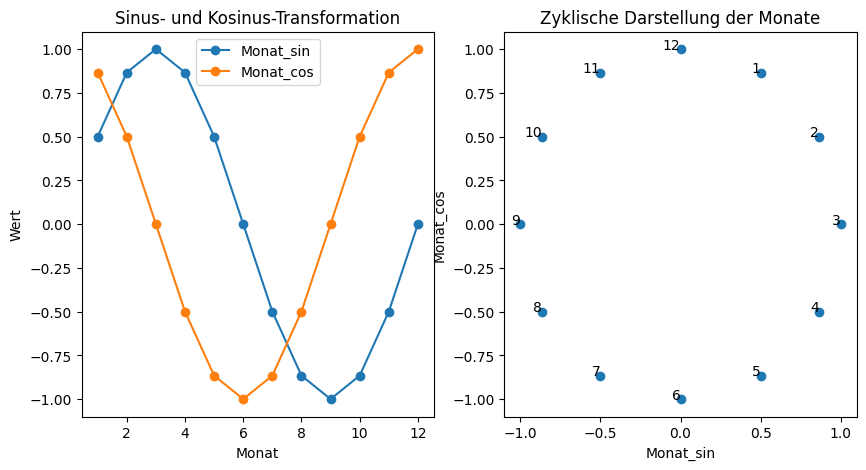

In [4]:
import numpy as np
import matplotlib.pyplot as plt

months = np.arange(1, 13)
month_sin = np.sin(2 * np.pi * months / 12)
month_cos = np.cos(2 * np.pi * months / 12)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(months, month_sin, 'o-', label='Monat_sin')
plt.plot(months, month_cos, 'o-', label='Monat_cos')
plt.xlabel('Monat')
plt.ylabel('Wert')
plt.title('Sinus- und Kosinus-Transformation')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(month_sin, month_cos)
for month in months:
    plt.text(np.sin(2 * np.pi * month / 12), np.cos(2 * np.pi * month / 12), str(month), ha='right')
plt.xlabel('Monat_sin')
plt.ylabel('Monat_cos')
plt.title('Zyklische Darstellung der Monate')

plt.show()


In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, concatenate, GRU
from sklearn.preprocessing import LabelEncoder

# CSV-Datei laden
df = pd.read_csv('DataFrame.csv')

# Sicherstellen, dass 'Datum' im Datetime-Format vorliegt
df['Datum'] = pd.to_datetime(df['Datum'])

df[df["Datum"] < "2024-06-01"]

# Datum in Komponenten zerlegen
df['Jahr'] = df['Datum'].dt.year
df['Monat'] = df['Datum'].dt.month

# Zyklische Eigenschaften extrahieren
df['Monat_sin'] = np.sin(2 * np.pi * df['Monat'] / 12)
df['Monat_cos'] = np.cos(2 * np.pi * df['Monat'] / 12)

# Kategorische Merkmale
categorical_features = ['Merkmal', 'Merkmalwert']
label_encoders = {}

# Label-Encoding für die kategorischen Merkmale
for feature in categorical_features:
    le = LabelEncoder()
    df[f'{feature}_encoded'] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Features und Zielvariable definieren
continuous_features = ['Jahr', 'Monat_sin', 'Monat_cos', 'USTR10Y', 'WeizenSpot', 'CornSpot', 'GER10Y', 'WtiOilSpot', 'SoySpot', 'AgriSpot']
encoded_features = [f'{feature}_encoded' for feature in categorical_features]
all_features = continuous_features + encoded_features

X_continuous = df[continuous_features]
X_encoded = df[encoded_features]

# Zielvariablen für die nächsten 12 Monate
y = pd.concat([df['Relativer Anteil'].shift(-i) for i in range(1, 13)], axis=1).dropna()
y.columns = [f'R_A_{i+1}' for i in range(12)]

# Anpassung der Features, um die gleiche Anzahl an Zeilen wie y zu haben
X_continuous = X_continuous.iloc[:len(y)]
X_encoded = X_encoded.iloc[:len(y)]

# Überprüfen Sie auf NaN-Werte
print("NaN values in X_continuous:", np.any(np.isnan(X_continuous)))
print("NaN values in X_encoded:", np.any(np.isnan(X_encoded)))
print("NaN values in y:", np.any(np.isnan(y)))

# Normalisieren der kontinuierlichen Daten
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_continuous_scaled = scaler_X.fit_transform(X_continuous)
y_scaled = scaler_y.fit_transform(y)

# Überprüfen Sie die Daten nach der Skalierung
print("NaN values in X_continuous_scaled:", np.any(np.isnan(X_continuous_scaled)))
print("NaN values in y_scaled:", np.any(np.isnan(y_scaled)))

# Daten in Sequenzen von 12 Monaten aufteilen
def create_sequences(X_continuous, X_encoded, y, sequence_length=12):
    X_cont_seq, X_enc_seq, y_seq = [], [], []
    for i in range(len(X_continuous) - sequence_length):
        X_cont_seq.append(X_continuous[i:i+sequence_length])
        X_enc_seq.append(X_encoded.iloc[i:i+sequence_length].values)
        y_seq.append(y[i+sequence_length])
    return np.array(X_cont_seq), np.array(X_enc_seq), np.array(y_seq)

X_cont_seq, X_enc_seq, y_seq = create_sequences(X_continuous_scaled, X_encoded, y_scaled, sequence_length=12)

# Daten in Trainings- und Testsets aufteilen
X_train_continuous, X_test_continuous, X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(
    X_cont_seq, X_enc_seq, y_seq, test_size=0.2, random_state=42
)

# Modell erstellen
continuous_input = Input(shape=(12, X_train_continuous.shape[2]))
gru_cont = GRU(64, return_sequences=False)(continuous_input)

# Embedding-Layer für jede kategorische Eingabe hinzufügen
embedding_inputs = []
embedding_layers = []
for i in range(X_train_encoded.shape[2]):
    input_layer = Input(shape=(12,))
    embedding_layer = Embedding(input_dim=int(X_encoded.iloc[:, i].max()) + 1, output_dim=10)(input_layer)
    embedding_flatten = Flatten()(embedding_layer)
    embedding_inputs.append(input_layer)
    embedding_layers.append(embedding_flatten)

# Alle Eingaben zusammenführen
merged = concatenate([gru_cont] + embedding_layers)

# Dense-Schicht
dense = Dense(64, activation='relu')(merged)
output = Dense(12, activation='linear')(dense)

model = Model(inputs=[continuous_input] + embedding_inputs, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
history = model.fit([X_train_continuous] + [X_train_encoded[:, :, i] for i in range(X_train_encoded.shape[2])],
                    y_train, epochs=40, batch_size=10, validation_split=0.2)

# Vorhersagen machen
predictions = model.predict([X_test_continuous] + [X_test_encoded[:, :, i] for i in range(X_test_encoded.shape[2])])

# Überprüfen Sie die Vorhersagen auf NaN-Werte
print("NaN values in predictions:", np.any(np.isnan(predictions)))

# Vorhersagen zurückskalieren
predictions_rescaled = scaler_y.inverse_transform(predictions)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Ergebnisse anzeigen
results = pd.DataFrame(predictions_rescaled, columns=[f'Predicted_{i+1}' for i in range(12)])
actuals = pd.DataFrame(y_test_rescaled, columns=[f'Actual_{i+1}' for i in range(12)])

results_combined = pd.concat([results, actuals], axis=1)
print(results_combined.head())

# Visualisierung der Verlaufsdaten des Trainings
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: nan - val_loss: nan
Epoch 2/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: nan - val_loss: nan
Epoch 3/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: nan - val_loss: nan
Epoch 4/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: nan - val_loss: nan
Epoch 5/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: nan - val_loss: nan
Epoch 6/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: nan - val_loss: nan
Epoch 7/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: nan - val_loss: nan
Epoch 8/20
306/896 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: nan

KeyboardInterrupt: 

In [61]:
# CSV-Datei laden
df = pd.read_csv('DataFrame.csv')

# Sicherstellen, dass 'Datum' im Datetime-Format vorliegt
df['Datum'] = pd.to_datetime(df['Datum'])

df[df["Datum"] < "2024-06-01"]

# Datum in Komponenten zerlegen
df['Jahr'] = df['Datum'].dt.year
df['Monat'] = df['Datum'].dt.month

# Zyklische Eigenschaften extrahieren
df['Monat_sin'] = np.sin(2 * np.pi * df['Monat'] / 12)
df['Monat_cos'] = np.cos(2 * np.pi * df['Monat'] / 12)


In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

class TimeSeriesSequencer:
    def __init__(self, file_path, date_column, target_column, sequence_length=12):
        self.file_path = file_path
        self.date_column = date_column
        self.target_column = target_column
        self.sequence_length = sequence_length
        self.data = None
        self.label_encoders = {}
        self.scaler_X = MinMaxScaler()
        self.scaler_y = MinMaxScaler()
        
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        self.data[self.date_column] = pd.to_datetime(self.data[self.date_column])
        self.data['Jahr'] = self.data[self.date_column].dt.year
        self.data['Monat'] = self.data[self.date_column].dt.month
        self.data['Monat_sin'] = np.sin(2 * np.pi * self.data['Monat'] / 12)
        self.data['Monat_cos'] = np.cos(2 * np.pi * self.data['Monat'] / 12)
        
    def encode_categorical_features(self, categorical_features):
        for feature in categorical_features:
            le = LabelEncoder()
            self.data[f'{feature}_encoded'] = le.fit_transform(self.data[feature])
            self.label_encoders[feature] = le

    def normalize_features(self, continuous_features):
        # Separate Jahr from other continuous features
        other_cont_features = [feat for feat in continuous_features if feat != 'Jahr']
        self.data[other_cont_features] = self.scaler_X.fit_transform(self.data[other_cont_features])
        # Scale Jahr separately
        self.data[['Jahr']] = MinMaxScaler().fit_transform(self.data[['Jahr']])
        
    def create_sequences(self, continuous_features, encoded_features):
        X_cont_seq, X_enc_seq, y_seq = [], [], []
        
        for merkmalwert, group in self.data.groupby('Merkmalwert'):
            group = group.sort_values(by=self.date_column)
            X_continuous = group[continuous_features]
            X_encoded = group[encoded_features]
            
            y = pd.concat([group[self.target_column].shift(-i) for i in range(1, 13)], axis=1).dropna()
            y.columns = [f'R_A_{i+1}' for i in range(12)]
            
            if len(y) < 12:
                continue
            
            X_continuous = X_continuous.iloc[:len(y)]
            X_encoded = X_encoded.iloc[:len(y)]
            
            y_scaled = self.scaler_y.fit_transform(y)
            
            for i in range(len(X_continuous) - self.sequence_length - 12 + 1):
                if pd.date_range(start=group[self.date_column].iloc[i], periods=self.sequence_length, freq='MS').equals(group[self.date_column].iloc[i:i+self.sequence_length]):
                    X_cont_seq.append(X_continuous.iloc[i:i+self.sequence_length].values)
                    X_enc_seq.append(X_encoded.iloc[i:i+self.sequence_length].values)
                    y_seq.append(y_scaled[i+self.sequence_length:i+self.sequence_length+12])
        
        return np.array(X_cont_seq), np.array(X_enc_seq), np.array(y_seq)

    def get_data(self, categorical_features, continuous_features):
        self.load_data()
        self.encode_categorical_features(categorical_features)
        self.normalize_features(continuous_features)
        encoded_features = [f'{feature}_encoded' for feature in categorical_features]
        return self.create_sequences(continuous_features, encoded_features)

    def show_sequences(self, X_cont_seq, X_enc_seq, y_seq, idx=0):
        print("Continuous Features Sequence:")
        print(X_cont_seq[idx])
        print("Encoded Features Sequence:")
        print(X_enc_seq[idx])
        print("Target Sequence:")
        print(y_seq[idx])

# Beispielnutzung
file_path = 'DataFrame.csv'
date_column = 'Datum'
target_column = 'Relativer Anteil'
categorical_features = ['Merkmal', 'Merkmalwert']
continuous_features = ['Jahr', 'Monat_sin', 'Monat_cos', 'USTR10Y', 'WeizenSpot', 'CornSpot', 'GER10Y', 'WtiOilSpot', 'SoySpot', 'AgriSpot']

sequencer = TimeSeriesSequencer(file_path, date_column, target_column)
X_cont_seq, X_enc_seq, y_seq = sequencer.get_data(categorical_features, continuous_features)

# Anzeigen einer Beispielsequenz (z.B. die erste Sequenz)
sequencer.show_sequences(X_cont_seq, X_enc_seq, y_seq, idx=0)


Continuous Features Sequence:


IndexError: index 0 is out of bounds for axis 0 with size 0

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

class TimeSeriesSequencer:
    def __init__(self, file_path, date_column, target_column, sequence_length=12):
        self.file_path = file_path
        self.date_column = date_column
        self.target_column = target_column
        self.sequence_length = sequence_length
        self.data = None
        self.label_encoders = {}
        self.scaler_X = MinMaxScaler()
        self.scaler_y = MinMaxScaler()
        
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        self.data[self.date_column] = pd.to_datetime(self.data[self.date_column])
        self.data['Jahr'] = self.data[self.date_column].dt.year
        self.data['Monat'] = self.data[self.date_column].dt.month
        self.data['Monat_sin'] = np.sin(2 * np.pi * self.data['Monat'] / 12)
        self.data['Monat_cos'] = np.cos(2 * np.pi * self.data['Monat'] / 12)
        
    def encode_categorical_features(self, categorical_features):
        for feature in categorical_features:
            le = LabelEncoder()
            self.data[f'{feature}_encoded'] = le.fit_transform(self.data[feature])
            self.label_encoders[feature] = le

    def normalize_features(self, continuous_features):
        other_cont_features = [feat for feat in continuous_features if feat != 'Jahr']
        self.data[other_cont_features] = self.scaler_X.fit_transform(self.data[other_cont_features])
        self.data[['Jahr']] = MinMaxScaler().fit_transform(self.data[['Jahr']])
        
    def create_sequences(self, continuous_features, encoded_features):
        X_cont_seq, X_enc_seq, y_seq = [], [], []
        
        for merkmalwert, group in self.data.groupby('Merkmalwert'):
            group = group.sort_values(by=self.date_column)
            X_continuous = group[continuous_features]
            X_encoded = group[encoded_features]
            
            y = pd.concat([group[self.target_column].shift(-i) for i in range(1, 13)], axis=1).dropna()
            y.columns = [f'R_A_{i+1}' for i in range(12)]
            
            if len(y) < self.sequence_length + 12 - 1:
                print(f"Skipping Merkmalwert {merkmalwert}: not enough data.")
                continue
            
            X_continuous = X_continuous.iloc[:len(y)]
            X_encoded = X_encoded.iloc[:len(y)]
            
            y_scaled = self.scaler_y.fit_transform(y)
            
            for i in range(len(X_continuous) - self.sequence_length - 12 + 1):
                date_seq = group[self.date_column].iloc[i:i+self.sequence_length]
                expected_dates = pd.date_range(start=date_seq.iloc[0], periods=self.sequence_length, freq='MS')
                if date_seq.reset_index(drop=True).equals(expected_dates):
                    X_cont_seq.append(X_continuous.iloc[i:i+self.sequence_length].values)
                    X_enc_seq.append(X_encoded.iloc[i:i+self.sequence_length].values)
                    y_seq.append(y_scaled[i+self.sequence_length:i+self.sequence_length+12])
                else:
                    print(f"Skipping non-continuous sequence starting at {date_seq.iloc[0]} for Merkmalwert {merkmalwert}")
        
        print(f"Total sequences created: {len(X_cont_seq)}")
        return np.array(X_cont_seq), np.array(X_enc_seq), np.array(y_seq)

    def get_data(self, categorical_features, continuous_features):
        self.load_data()
        self.encode_categorical_features(categorical_features)
        self.normalize_features(continuous_features)
        encoded_features = [f'{feature}_encoded' for feature in categorical_features]
        return self.create_sequences(continuous_features, encoded_features)

    def show_sequences(self, X_cont_seq, X_enc_seq, y_seq, idx=0):
        if len(X_cont_seq) == 0:
            print("No sequences available to show.")
            return
        print("Continuous Features Sequence:")
        print(X_cont_seq[idx])
        print("Encoded Features Sequence:")
        print(X_enc_seq[idx])
        print("Target Sequence:")
        print(y_seq[idx])

# Beispielnutzung
file_path = 'DataFrame.csv'
date_column = 'Datum'
target_column = 'Relativer Anteil'
categorical_features = ['Merkmal', 'Merkmalwert']
continuous_features = ['Jahr', 'Monat_sin', 'Monat_cos', 'USTR10Y', 'WeizenSpot', 'CornSpot', 'GER10Y', 'WtiOilSpot', 'SoySpot', 'AgriSpot']

sequencer = TimeSeriesSequencer(file_path, date_column, target_column)
X_cont_seq, X_enc_seq, y_seq = sequencer.get_data(categorical_features, continuous_features)

# Anzeigen einer Beispielsequenz (z.B. die erste Sequenz)
sequencer.show_sequences(X_cont_seq, X_enc_seq, y_seq, idx=0)


Skipping Merkmalwert 5: not enough data.
Skipping non-continuous sequence starting at 2014-01-01 00:00:00 for Merkmalwert 30
Skipping non-continuous sequence starting at 2014-02-01 00:00:00 for Merkmalwert 30
Skipping Merkmalwert 33: not enough data.
Skipping non-continuous sequence starting at 2014-01-01 00:00:00 for Merkmalwert 35
Skipping non-continuous sequence starting at 2014-02-01 00:00:00 for Merkmalwert 35
Skipping non-continuous sequence starting at 2014-03-01 00:00:00 for Merkmalwert 35
Skipping non-continuous sequence starting at 2014-04-01 00:00:00 for Merkmalwert 35
Skipping non-continuous sequence starting at 2014-05-01 00:00:00 for Merkmalwert 35
Skipping non-continuous sequence starting at 2014-06-01 00:00:00 for Merkmalwert 35
Skipping non-continuous sequence starting at 2014-07-01 00:00:00 for Merkmalwert 35
Skipping non-continuous sequence starting at 2014-08-01 00:00:00 for Merkmalwert 35
Skipping non-continuous sequence starting at 2014-09-01 00:00:00 for Merkmalw

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

class TimeSeriesSequencer:
    def __init__(self, file_path, date_column, target_column, sequence_length=12):
        self.file_path = file_path
        self.date_column = date_column
        self.target_column = target_column
        self.sequence_length = sequence_length
        self.data = None
        self.label_encoders = {}
        self.scaler_X = MinMaxScaler()
        self.scaler_y = MinMaxScaler()
        
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        self.data[self.date_column] = pd.to_datetime(self.data[self.date_column])
        self.data['Jahr'] = self.data[self.date_column].dt.year
        self.data['Monat'] = self.data[self.date_column].dt.month
        self.data['Monat_sin'] = np.sin(2 * np.pi * self.data['Monat'] / 12)
        self.data['Monat_cos'] = np.cos(2 * np.pi * self.data['Monat'] / 12)
        
    def encode_categorical_features(self, categorical_features):
        for feature in categorical_features:
            le = LabelEncoder()
            self.data[f'{feature}_encoded'] = le.fit_transform(self.data[feature])
            self.label_encoders[feature] = le

    def normalize_features(self, continuous_features):
        other_cont_features = [feat for feat in continuous_features if feat != 'Jahr']
        self.data[other_cont_features] = self.scaler_X.fit_transform(self.data[other_cont_features])
        self.data[['Jahr']] = MinMaxScaler().fit_transform(self.data[['Jahr']])
        
    def create_sequences(self, continuous_features, encoded_features):
        X_cont_seq, X_enc_seq, y_seq = [], [], []
        
        for merkmalwert, group in self.data.groupby('Merkmalwert'):
            group = group.sort_values(by=self.date_column)
            X_continuous = group[continuous_features]
            X_encoded = group[encoded_features]
            
            y = pd.concat([group[self.target_column].shift(-i) for i in range(1, 13)], axis=1).dropna()
            y.columns = [f'R_A_{i+1}' for i in range(12)]
            
            if len(y) < self.sequence_length + 12 - 1:
                print(f"Skipping Merkmalwert {merkmalwert}: not enough data.")
                continue
            
            X_continuous = X_continuous.iloc[:len(y)]
            X_encoded = X_encoded.iloc[:len(y)]
            
            y_scaled = self.scaler_y.fit_transform(y)
            
            for i in range(len(X_continuous) - self.sequence_length - 12 + 1):
                date_seq = group[self.date_column].iloc[i:i+self.sequence_length]
                expected_dates = pd.date_range(start=date_seq.iloc[0], periods=self.sequence_length, freq='MS')
                if date_seq.reset_index(drop=True).equals(expected_dates.to_series().reset_index(drop=True)):
                    X_cont_seq.append(X_continuous.iloc[i:i+self.sequence_length].values)
                    X_enc_seq.append(X_encoded.iloc[i:i+self.sequence_length].values)
                    y_seq.append(y_scaled[i+self.sequence_length:i+self.sequence_length+12])
                else:
                    print(f"Skipping non-continuous sequence starting at {date_seq.iloc[0]} for Merkmalwert {merkmalwert}")
                    print(f"Expected dates: {expected_dates}")
                    print(f"Actual dates: {date_seq}")
        
        print(f"Total sequences created: {len(X_cont_seq)}")
        return np.array(X_cont_seq), np.array(X_enc_seq), np.array(y_seq)

    def get_data(self, categorical_features, continuous_features):
        self.load_data()
        self.encode_categorical_features(categorical_features)
        self.normalize_features(continuous_features)
        encoded_features = [f'{feature}_encoded' for feature in categorical_features]
        return self.create_sequences(continuous_features, encoded_features)

    def show_sequences(self, X_cont_seq, X_enc_seq, y_seq, idx=0):
        if len(X_cont_seq) == 0:
            print("No sequences available to show.")
            return
        print("Continuous Features Sequence:")
        print(X_cont_seq[idx])
        print("Encoded Features Sequence:")
        print(X_enc_seq[idx])
        print("Target Sequence:")
        print(y_seq[idx])

# Beispielnutzung
file_path = 'DataFrame.csv'
date_column = 'Datum'
target_column = 'Relativer Anteil'
categorical_features = ['Merkmal', 'Merkmalwert']
continuous_features = ['Jahr', 'Monat_sin', 'Monat_cos', 'USTR10Y', 'WeizenSpot', 'CornSpot', 'GER10Y', 'WtiOilSpot', 'SoySpot', 'AgriSpot']

sequencer = TimeSeriesSequencer(file_path, date_column, target_column)
X_cont_seq, X_enc_seq, y_seq = sequencer.get_data(categorical_features, continuous_features)

# Anzeigen einer Beispielsequenz (z.B. die erste Sequenz)
sequencer.show_sequences(X_cont_seq, X_enc_seq, y_seq, idx=0)


Skipping Merkmalwert 5: not enough data.
Skipping Merkmalwert 33: not enough data.
Skipping non-continuous sequence starting at 2014-01-01 00:00:00 for Merkmalwert 40
Expected dates: DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', freq='MS')
Actual dates: 345    2014-01-01
4058   2014-01-01
7576   2014-01-01
346    2014-02-01
4059   2014-02-01
7577   2014-02-01
347    2014-03-01
4060   2014-03-01
7578   2014-03-01
348    2014-04-01
4061   2014-04-01
7579   2014-04-01
Name: Datum, dtype: datetime64[ns]
Skipping non-continuous sequence starting at 2014-01-01 00:00:00 for Merkmalwert 40
Expected dates: DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '201

In [76]:
sequencer.show_sequences(X_cont_seq, X_enc_seq, y_seq, idx=0)


Continuous Features Sequence:
[[0.         0.75       0.9330127  0.58194378 0.29297084 0.27298984
  0.73145072 0.81964809 0.50650629 0.31714606]
 [0.         0.9330127  0.75       0.48094331 0.22630626 0.28571117
  0.65005537 0.80278592 0.50371833 0.32490547]
 [0.         1.         0.5        0.48713673 0.32108123 0.34354679
  0.62679956 0.89170507 0.65148638 0.45267352]
 [0.         0.9330127  0.25       0.52215341 0.40196831 0.42336356
  0.63178295 0.83745287 0.7257705  0.53585776]
 [0.         0.75       0.0669873  0.48832778 0.48792783 0.40948476
  0.60105205 0.83410138 0.47769317 0.55380139]
 [0.         0.5        0.         0.46784183 0.39243014 0.31143227
  0.57281285 0.86604525 0.48079231 0.41227742]
 [0.         0.25       0.0669873  0.47713197 0.32144259 0.28282293
  0.53986711 0.8961039  0.39714727 0.32376515]
 [0.         0.0669873  0.25       0.45998094 0.25693726 0.16772496
  0.50941307 0.81797235 0.28809943 0.23907359]
 [0.         0.         0.5        0.42448785 0.26

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, concatenate, GRU, Reshape

# Modell erstellen
continuous_input = Input(shape=(12, len(continuous_features)))
gru_cont = GRU(64, return_sequences=False)(continuous_input)

# Embedding-Layer für jede kategorische Eingabe hinzufügen
embedding_inputs = []
embedding_layers = []
for i in range(X_enc_seq.shape[2]):
    input_layer = Input(shape=(12,))
    embedding_layer = Embedding(input_dim=int(X_enc_seq[:, :, i].max()) + 1, output_dim=10)(input_layer)
    embedding_flatten = Flatten()(embedding_layer)
    embedding_inputs.append(input_layer)
    embedding_layers.append(embedding_flatten)

# Alle Eingaben zusammenführen
merged = concatenate([gru_cont] + embedding_layers)

# Dense-Schicht
dense = Dense(64, activation='relu')(merged)
output = Dense(12 * 12, activation='linear')(dense)  # 12 * 12 für 12 Zeitpunkte und 12 Zielwerte
output = Reshape((12, 12))(output)  # Zielausgabe auf die richtige Form bringen

model = Model(inputs=[continuous_input] + embedding_inputs, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
history = model.fit([X_cont_seq] + [X_enc_seq[:, :, i] for i in range(X_enc_seq.shape[2])],
                    y_seq, epochs=20, batch_size=10, validation_split=0.2)

# Vorhersagen machen
predictions = model.predict([X_cont_seq] + [X_enc_seq[:, :, i] for i in range(X_enc_seq.shape[2])])

# Ergebnisse anzeigen
print(predictions)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0586 - val_loss: 0.0760
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0393 - val_loss: 0.0756
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0379 - val_loss: 0.0721
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0364 - val_loss: 0.0745
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0351 - val_loss: 0.0694
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0332 - val_loss: 0.0698
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0331 - val_loss: 0.0714
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0336 - val_loss: 0.0701
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0334 - val_loss: 0.0706
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0323 - val_loss: 0.0679
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0309 - val_loss: 0.0691
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Continuous Features Sequence:
[[0.         0.75       0.9330127  0.58194378 0.29297084 0.27298984
  0.73145072 0.81964809 0.50650629 0.31714606]
 [0.         0.9330127  0.75       0.48094331 0.22630626 0.28571117
  0.65005537 0.80278592 0.50371833 0.32490547]
 [0.         1.         0.5        0.48713673 0.32108123 0.34354679
  0.62679956 0.89170507 0.65148638 0.45267352]
 [0.         0.9330127  0.25       0.52215341 0.40196831 0.42336356
  0.63178295 0.83745287 0.7257705  0.53585776]
 [0.         0.75       0.0669873  0.48832778 0.48792783 0.40948476
  0.60105205 0.83410138 0.47769317 0.55380139]
 [0.         0.5        0.         0.46784183 0.39243014 0.31143227
  0.57281285 0.86604525 0.48079231 0.41227742]
 [0.         0.25       0.0669873  0.47713197 0.32144259 0.28282293
  0.53986711 0.8961039  0.39714727 0.32376515]
 [0.         0.0669873  0.25       0.45998094 0.25693726 0.16772496
  0.50941307 0.81797235 0.28809943 0.23907359]
 [0.         0.         0.5        0.42448785 0.26

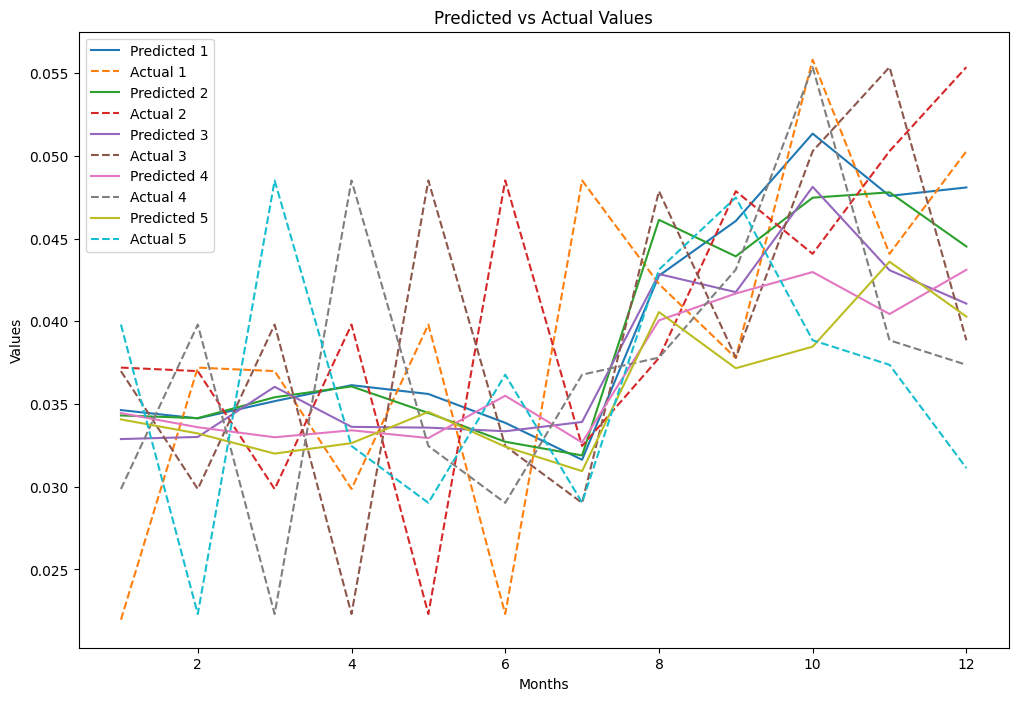

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, concatenate, GRU, Reshape

# Definiere TimeSeriesSequencer
class TimeSeriesSequencer:
    def __init__(self, file_path, date_column, target_column, sequence_length=12):
        self.file_path = file_path
        self.date_column = date_column
        self.target_column = target_column
        self.sequence_length = sequence_length
        self.data = None
        self.label_encoders = {}
        self.scaler_X = MinMaxScaler()
        self.scaler_y = MinMaxScaler()
        
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        self.data[self.date_column] = pd.to_datetime(self.data[self.date_column])
        self.data['Jahr'] = self.data[self.date_column].dt.year
        self.data['Monat'] = self.data[self.date_column].dt.month
        self.data['Monat_sin'] = np.sin(2 * np.pi * self.data['Monat'] / 12)
        self.data['Monat_cos'] = np.cos(2 * np.pi * self.data['Monat'] / 12)
        
    def encode_categorical_features(self, categorical_features):
        for feature in categorical_features:
            le = LabelEncoder()
            self.data[f'{feature}_encoded'] = le.fit_transform(self.data[feature])
            self.label_encoders[feature] = le

    def normalize_features(self, continuous_features):
        other_cont_features = [feat for feat in continuous_features if feat != 'Jahr']
        self.data[other_cont_features] = self.scaler_X.fit_transform(self.data[other_cont_features])
        self.data[['Jahr']] = MinMaxScaler().fit_transform(self.data[['Jahr']])
        
    def create_sequences(self, continuous_features, encoded_features):
        X_cont_seq, X_enc_seq, y_seq = [], [], []
        
        for merkmalwert, group in self.data.groupby('Merkmalwert'):
            group = group.sort_values(by=self.date_column)
            X_continuous = group[continuous_features]
            X_encoded = group[encoded_features]
            
            y = pd.concat([group[self.target_column].shift(-i) for i in range(1, 13)], axis=1).dropna()
            y.columns = [f'R_A_{i+1}' for i in range(12)]
            
            if len(y) < self.sequence_length + 12 - 1:
                continue
            
            X_continuous = X_continuous.iloc[:len(y)]
            X_encoded = X_encoded.iloc[:len(y)]
            
            y_scaled = self.scaler_y.fit_transform(y)
            
            for i in range(len(X_continuous) - self.sequence_length - 12 + 1):
                date_seq = group[self.date_column].iloc[i:i+self.sequence_length]
                expected_dates = pd.date_range(start=date_seq.iloc[0], periods=self.sequence_length, freq='MS')
                if date_seq.reset_index(drop=True).equals(expected_dates.to_series().reset_index(drop=True)):
                    X_cont_seq.append(X_continuous.iloc[i:i+self.sequence_length].values)
                    X_enc_seq.append(X_encoded.iloc[i:i+self.sequence_length].values)
                    y_seq.append(y_scaled[i+self.sequence_length:i+self.sequence_length+12])
        
        return np.array(X_cont_seq), np.array(X_enc_seq), np.array(y_seq)

    def get_data(self, categorical_features, continuous_features):
        self.load_data()
        self.encode_categorical_features(categorical_features)
        self.normalize_features(continuous_features)
        encoded_features = [f'{feature}_encoded' for feature in categorical_features]
        return self.create_sequences(continuous_features, encoded_features)

    def show_sequences(self, X_cont_seq, X_enc_seq, y_seq, idx=0):
        if len(X_cont_seq) == 0:
            print("No sequences available to show.")
            return
        print("Continuous Features Sequence:")
        print(X_cont_seq[idx])
        print("Encoded Features Sequence:")
        print(X_enc_seq[idx])
        print("Target Sequence:")
        print(y_seq[idx])

# Beispielnutzung
file_path = 'DataFrame.csv'
date_column = 'Datum'
target_column = 'Relativer Anteil'
categorical_features = ['Merkmal', 'Merkmalwert']
continuous_features = ['Jahr', 'Monat_sin', 'Monat_cos', 'USTR10Y', 'WeizenSpot', 'CornSpot', 'GER10Y', 'WtiOilSpot', 'SoySpot', 'AgriSpot']

sequencer = TimeSeriesSequencer(file_path, date_column, target_column)
X_cont_seq, X_enc_seq, y_seq = sequencer.get_data(categorical_features, continuous_features)

# Anzeigen einer Beispielsequenz (z.B. die erste Sequenz)
sequencer.show_sequences(X_cont_seq, X_enc_seq, y_seq, idx=0)

# Modell erstellen
continuous_input = Input(shape=(12, len(continuous_features)))
gru_cont = GRU(64, return_sequences=False)(continuous_input)

# Embedding-Layer für jede kategorische Eingabe hinzufügen
embedding_inputs = []
embedding_layers = []
for i in range(X_enc_seq.shape[2]):
    input_layer = Input(shape=(12,))
    embedding_layer = Embedding(input_dim=int(X_enc_seq[:, :, i].max()) + 1, output_dim=10)(input_layer)
    embedding_flatten = Flatten()(embedding_layer)
    embedding_inputs.append(input_layer)
    embedding_layers.append(embedding_flatten)

# Alle Eingaben zusammenführen
merged = concatenate([gru_cont] + embedding_layers)

# Dense-Schicht
dense = Dense(64, activation='relu')(merged)
output = Dense(12 * 12, activation='linear')(dense)  # 12 * 12 für 12 Zeitpunkte und 12 Zielwerte
output = Reshape((12, 12))(output)  # Zielausgabe auf die richtige Form bringen

model = Model(inputs=[continuous_input] + embedding_inputs, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
history = model.fit([X_cont_seq] + [X_enc_seq[:, :, i] for i in range(X_enc_seq.shape[2])],
                    y_seq, epochs=20, batch_size=10, validation_split=0.2)

# Vorhersagen machen
predictions = model.predict([X_cont_seq] + [X_enc_seq[:, :, i] for i in range(X_enc_seq.shape[2])])

# Rückskalieren der Vorhersagen und tatsächlichen Werte
y_seq_rescaled = sequencer.scaler_y.inverse_transform(y_seq.reshape(-1, 12))
predictions_rescaled = sequencer.scaler_y.inverse_transform(predictions.reshape(-1, 12))

# Vergleich der Vorhersagen mit den tatsächlichen Werten
for i in range(min(len(predictions_rescaled), 5)):  # Zeige die ersten 5 Vorhersagen
    print(f"Prediction {i + 1}:")
    print(predictions_rescaled[i])
    print(f"Actual {i + 1}:")
    print(y_seq_rescaled[i])

# Ergebnisse in einer Tabelle anzeigen
results = pd.DataFrame(predictions_rescaled[:5], columns=[f'Predicted_{i+1}' for i in range(12)])
actuals = pd.DataFrame(y_seq_rescaled[:5], columns=[f'Actual_{i+1}' for i in range(12)])
results_combined = pd.concat([results, actuals], axis=1)
print(results_combined)

# Grafische Darstellung
plt.figure(figsize=(12, 8))
for i in range(5):  # Zeige die ersten 5 Vorhersagen
    plt.plot(range(1, 13), predictions_rescaled[i], label=f'Predicted {i+1}')
    plt.plot(range(1, 13), y_seq_rescaled[i], label=f'Actual {i+1}', linestyle='dashed')
plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


Total sequences created: 3910
Continuous Features Sequence for Merkmalwert 30 starting at 2014-01-01 00:00:00:
[[0.         0.75       0.9330127  0.58194378 0.29297084 0.27298984
  0.73145072 0.81964809 0.50650629 0.31714606]
 [0.         0.9330127  0.75       0.48094331 0.22630626 0.28571117
  0.65005537 0.80278592 0.50371833 0.32490547]
 [0.         1.         0.5        0.48713673 0.32108123 0.34354679
  0.62679956 0.89170507 0.65148638 0.45267352]
 [0.         0.9330127  0.25       0.52215341 0.40196831 0.42336356
  0.63178295 0.83745287 0.7257705  0.53585776]
 [0.         0.75       0.0669873  0.48832778 0.48792783 0.40948476
  0.60105205 0.83410138 0.47769317 0.55380139]
 [0.         0.5        0.         0.46784183 0.39243014 0.31143227
  0.57281285 0.86604525 0.48079231 0.41227742]
 [0.         0.25       0.0669873  0.47713197 0.32144259 0.28282293
  0.53986711 0.8961039  0.39714727 0.32376515]
 [0.         0.0669873  0.25       0.45998094 0.25693726 0.16772496
  0.50941307 0.8

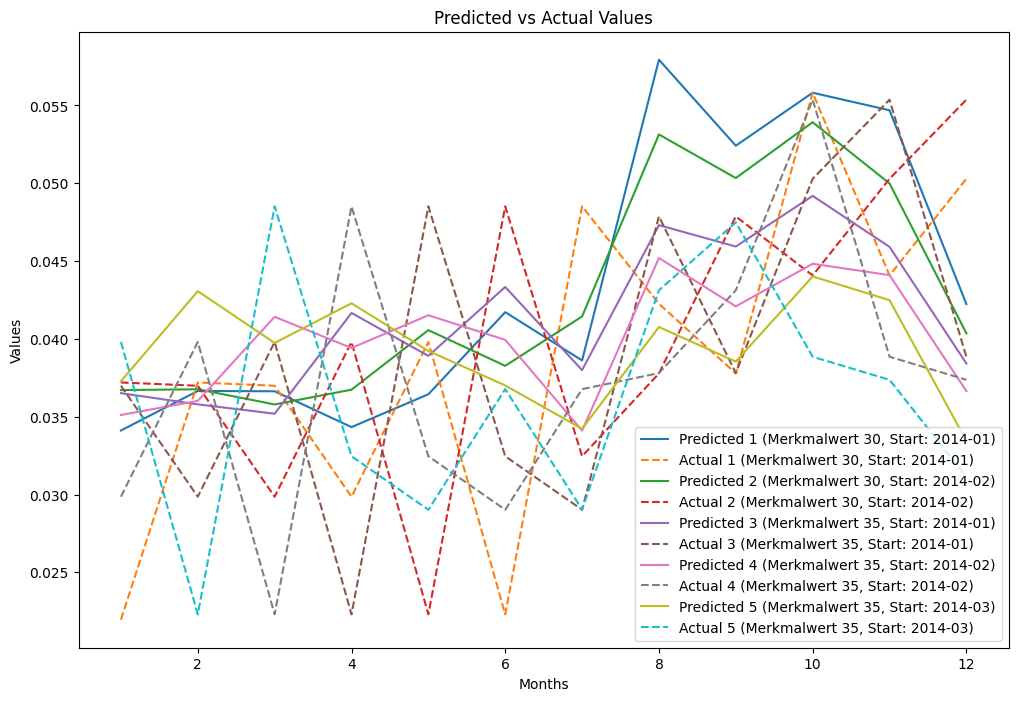

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, concatenate, GRU, Reshape

# Definiere TimeSeriesSequencer
class TimeSeriesSequencer:
    def __init__(self, file_path, date_column, target_column, sequence_length=12):
        self.file_path = file_path
        self.date_column = date_column
        self.target_column = target_column
        self.sequence_length = sequence_length
        self.data = None
        self.label_encoders = {}
        self.scaler_X = MinMaxScaler()
        self.scaler_y = MinMaxScaler()
        
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        self.data[self.date_column] = pd.to_datetime(self.data[self.date_column])
        self.data['Jahr'] = self.data[self.date_column].dt.year
        self.data['Monat'] = self.data[self.date_column].dt.month
        self.data['Monat_sin'] = np.sin(2 * np.pi * self.data['Monat'] / 12)
        self.data['Monat_cos'] = np.cos(2 * np.pi * self.data['Monat'] / 12)
        
    def encode_categorical_features(self, categorical_features):
        for feature in categorical_features:
            le = LabelEncoder()
            self.data[f'{feature}_encoded'] = le.fit_transform(self.data[feature])
            self.label_encoders[feature] = le

    def normalize_features(self, continuous_features):
        other_cont_features = [feat for feat in continuous_features if feat != 'Jahr']
        self.data[other_cont_features] = self.scaler_X.fit_transform(self.data[other_cont_features])
        self.data[['Jahr']] = MinMaxScaler().fit_transform(self.data[['Jahr']])
        
    def create_sequences(self, continuous_features, encoded_features):
        X_cont_seq, X_enc_seq, y_seq, start_dates, merkmalwerte = [], [], [], [], []
        
        for merkmalwert, group in self.data.groupby('Merkmalwert'):
            group = group.sort_values(by=self.date_column)
            X_continuous = group[continuous_features]
            X_encoded = group[encoded_features]
            
            y = pd.concat([group[self.target_column].shift(-i) for i in range(1, 13)], axis=1).dropna()
            y.columns = [f'R_A_{i+1}' for i in range(12)]
            
            if len(y) < self.sequence_length + 12 - 1:
                continue
            
            X_continuous = X_continuous.iloc[:len(y)]
            X_encoded = X_encoded.iloc[:len(y)]
            
            y_scaled = self.scaler_y.fit_transform(y)
            
            for i in range(len(X_continuous) - self.sequence_length - 12 + 1):
                date_seq = group[self.date_column].iloc[i:i+self.sequence_length]
                expected_dates = pd.date_range(start=date_seq.iloc[0], periods=self.sequence_length, freq='MS')
                if date_seq.reset_index(drop=True).equals(expected_dates.to_series().reset_index(drop=True)):
                    X_cont_seq.append(X_continuous.iloc[i:i+self.sequence_length].values)
                    X_enc_seq.append(X_encoded.iloc[i:i+self.sequence_length].values)
                    y_seq.append(y_scaled[i+self.sequence_length:i+self.sequence_length+12])
                    start_dates.append(date_seq.iloc[0])
                    merkmalwerte.append(merkmalwert)
        
        print(f"Total sequences created: {len(X_cont_seq)}")  # Ausgabe der Gesamtanzahl der erstellten Sequenzen
        return np.array(X_cont_seq), np.array(X_enc_seq), np.array(y_seq), start_dates, merkmalwerte

    def get_data(self, categorical_features, continuous_features):
        self.load_data()
        self.encode_categorical_features(categorical_features)
        self.normalize_features(continuous_features)
        encoded_features = [f'{feature}_encoded' for feature in categorical_features]
        return self.create_sequences(continuous_features, encoded_features)

    def show_sequences(self, X_cont_seq, X_enc_seq, y_seq, start_dates, merkmalwerte, idx=0):
        if len(X_cont_seq) == 0:
            print("No sequences available to show.")
            return
        print(f"Continuous Features Sequence for Merkmalwert {merkmalwerte[idx]} starting at {start_dates[idx]}:")
        print(X_cont_seq[idx])
        print("Encoded Features Sequence:")
        print(X_enc_seq[idx])
        print("Target Sequence:")
        print(y_seq[idx])

# Beispielnutzung
file_path = 'DataFrame.csv'
date_column = 'Datum'
target_column = 'Relativer Anteil'
categorical_features = ['Merkmal', 'Merkmalwert']
continuous_features = ['Jahr', 'Monat_sin', 'Monat_cos', 'USTR10Y', 'WeizenSpot', 'CornSpot', 'GER10Y', 'WtiOilSpot', 'SoySpot', 'AgriSpot']

sequencer = TimeSeriesSequencer(file_path, date_column, target_column)
X_cont_seq, X_enc_seq, y_seq, start_dates, merkmalwerte = sequencer.get_data(categorical_features, continuous_features)

# Anzeigen einer Beispielsequenz (z.B. die erste Sequenz)
sequencer.show_sequences(X_cont_seq, X_enc_seq, y_seq, start_dates, merkmalwerte, idx=0)

# Modell erstellen
continuous_input = Input(shape=(12, len(continuous_features)))
gru_cont = GRU(64, return_sequences=False)(continuous_input)

# Embedding-Layer für jede kategorische Eingabe hinzufügen
embedding_inputs = []
embedding_layers = []
for i in range(X_enc_seq.shape[2]):
    input_layer = Input(shape=(12,))
    embedding_layer = Embedding(input_dim=int(X_enc_seq[:, :, i].max()) + 1, output_dim=10)(input_layer)
    embedding_flatten = Flatten()(embedding_layer)
    embedding_inputs.append(input_layer)
    embedding_layers.append(embedding_flatten)

# Alle Eingaben zusammenführen
merged = concatenate([gru_cont] + embedding_layers)

# Dense-Schicht
dense = Dense(64, activation='relu')(merged)
output = Dense(12 * 12, activation='linear')(dense)  # 12 * 12 für 12 Zeitpunkte und 12 Zielwerte
output = Reshape((12, 12))(output)  # Zielausgabe auf die richtige Form bringen

model = Model(inputs=[continuous_input] + embedding_inputs, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
history = model.fit([X_cont_seq] + [X_enc_seq[:, :, i] for i in range(X_enc_seq.shape[2])],
                    y_seq, epochs=20, batch_size=10, validation_split=0.2)

# Vorhersagen machen
predictions = model.predict([X_cont_seq] + [X_enc_seq[:, :, i] for i in range(X_enc_seq.shape[2])])

# Rückskalieren der Vorhersagen und tatsächlichen Werte
y_seq_rescaled = sequencer.scaler_y.inverse_transform(y_seq.reshape(-1, 12))
predictions_rescaled = sequencer.scaler_y.inverse_transform(predictions.reshape(-1, 12))

# Vergleich der Vorhersagen mit den tatsächlichen Werten
for i in range(min(len(predictions_rescaled), 5)):  # Zeige die ersten 5 Vorhersagen
    print(f"Prediction {i + 1}:")
    print(predictions_rescaled[i])
    print(f"Actual {i + 1}:")
    print(y_seq_rescaled[i])

# Ergebnisse in einer Tabelle anzeigen
results = pd.DataFrame(predictions_rescaled[:5], columns=[f'Predicted_{i+1}' for i in range(12)])
actuals = pd.DataFrame(y_seq_rescaled[:5], columns=[f'Actual_{i+1}' for i in range(12)])
results_combined = pd.concat([results, actuals], axis=1)
print(results_combined)

# Grafische Darstellung
plt.figure(figsize=(12, 8))
for i in range(5):  # Zeige die ersten 5 Vorhersagen
    plt.plot(range(1, 13), predictions_rescaled[i], label=f'Predicted {i+1} (Merkmalwert {merkmalwerte[i]}, Start: {start_dates[i].strftime("%Y-%m")})')
    plt.plot(range(1, 13), y_seq_rescaled[i], label=f'Actual {i+1} (Merkmalwert {merkmalwerte[i]}, Start: {start_dates[i].strftime("%Y-%m")})', linestyle='dashed')
plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


Total sequences created: 3910
Total training sequences: 3714
Total test sequences: 196
Continuous Features Sequence for Merkmalwert 133 starting at 2016-10-01 00:00:00:
[[0.2        0.0669873  0.75       0.2527394  0.03134926 0.11567125
  0.16749723 0.30404273 0.17254847 0.07779067]
 [0.2        0.25       0.9330127  0.2994283  0.05369125 0.12261066
  0.24197121 0.28162966 0.19299772 0.11953679]
 [0.2        0.5        1.         0.44735588 0.         0.0925381
  0.29263566 0.32760788 0.24101535 0.07530687]
 [0.3        0.75       0.9330127  0.44521201 0.01693494 0.10583816
  0.24529347 0.35546711 0.20228879 0.0986965 ]
 [0.3        0.9330127  0.75       0.45521677 0.05369125 0.14748003
  0.32392027 0.35714286 0.24628008 0.16592939]
 [0.3        1.         0.5        0.45235827 0.06955102 0.16136429
  0.27242525 0.35661919 0.25309438 0.16545098]
 [0.3        0.9330127  0.25       0.42567889 0.03418662 0.13244375
  0.27131783 0.31901969 0.11748792 0.11458886]
 [0.3        0.75       0.0

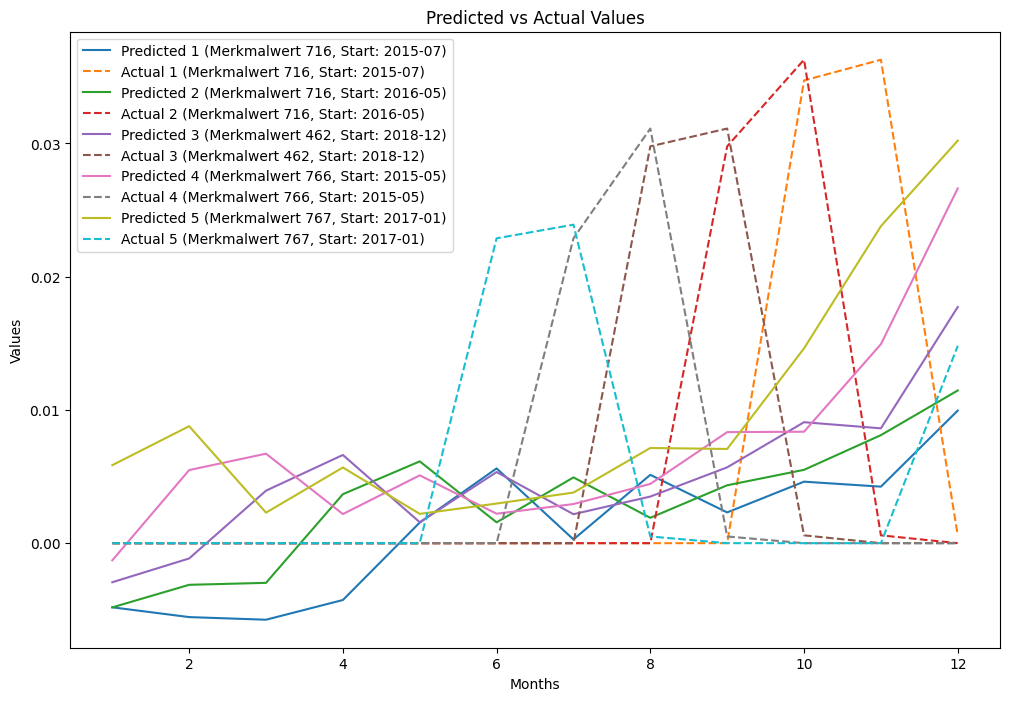

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, concatenate, GRU, Reshape

# Definiere TimeSeriesSequencer
class TimeSeriesSequencer:
    def __init__(self, file_path, date_column, target_column, sequence_length=12):
        self.file_path = file_path
        self.date_column = date_column
        self.target_column = target_column
        self.sequence_length = sequence_length
        self.data = None
        self.label_encoders = {}
        self.scaler_X = MinMaxScaler()
        self.scaler_y = MinMaxScaler()
        
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        self.data[self.date_column] = pd.to_datetime(self.data[self.date_column])
        self.data['Jahr'] = self.data[self.date_column].dt.year
        self.data['Monat'] = self.data[self.date_column].dt.month
        self.data['Monat_sin'] = np.sin(2 * np.pi * self.data['Monat'] / 12)
        self.data['Monat_cos'] = np.cos(2 * np.pi * self.data['Monat'] / 12)
        
    def encode_categorical_features(self, categorical_features):
        for feature in categorical_features:
            le = LabelEncoder()
            self.data[f'{feature}_encoded'] = le.fit_transform(self.data[feature])
            self.label_encoders[feature] = le

    def normalize_features(self, continuous_features):
        other_cont_features = [feat for feat in continuous_features if feat != 'Jahr']
        self.data[other_cont_features] = self.scaler_X.fit_transform(self.data[other_cont_features])
        self.data[['Jahr']] = MinMaxScaler().fit_transform(self.data[['Jahr']])
        
    def create_sequences(self, continuous_features, encoded_features):
        X_cont_seq, X_enc_seq, y_seq, start_dates, merkmalwerte = [], [], [], [], []
        
        for merkmalwert, group in self.data.groupby('Merkmalwert'):
            group = group.sort_values(by=self.date_column)
            X_continuous = group[continuous_features]
            X_encoded = group[encoded_features]
            
            y = pd.concat([group[self.target_column].shift(-i) for i in range(1, 13)], axis=1).dropna()
            y.columns = [f'R_A_{i+1}' for i in range(12)]
            
            if len(y) < self.sequence_length + 12 - 1:
                continue
            
            X_continuous = X_continuous.iloc[:len(y)]
            X_encoded = X_encoded.iloc[:len(y)]
            
            y_scaled = self.scaler_y.fit_transform(y)
            
            for i in range(len(X_continuous) - self.sequence_length - 12 + 1):
                date_seq = group[self.date_column].iloc[i:i+self.sequence_length]
                expected_dates = pd.date_range(start=date_seq.iloc[0], periods=self.sequence_length, freq='MS')
                if date_seq.reset_index(drop=True).equals(expected_dates.to_series().reset_index(drop=True)):
                    X_cont_seq.append(X_continuous.iloc[i:i+self.sequence_length].values)
                    X_enc_seq.append(X_encoded.iloc[i:i+self.sequence_length].values)
                    y_seq.append(y_scaled[i+self.sequence_length:i+self.sequence_length+12])
                    start_dates.append(date_seq.iloc[0])
                    merkmalwerte.append(merkmalwert)
        
        print(f"Total sequences created: {len(X_cont_seq)}")  # Ausgabe der Gesamtanzahl der erstellten Sequenzen
        return np.array(X_cont_seq), np.array(X_enc_seq), np.array(y_seq), start_dates, merkmalwerte

    def get_data(self, categorical_features, continuous_features):
        self.load_data()
        self.encode_categorical_features(categorical_features)
        self.normalize_features(continuous_features)
        encoded_features = [f'{feature}_encoded' for feature in categorical_features]
        return self.create_sequences(continuous_features, encoded_features)

    def show_sequences(self, X_cont_seq, X_enc_seq, y_seq, start_dates, merkmalwerte, idx=0):
        if len(X_cont_seq) == 0:
            print("No sequences available to show.")
            return
        print(f"Continuous Features Sequence for Merkmalwert {merkmalwerte[idx]} starting at {start_dates[idx]}:")
        print(X_cont_seq[idx])
        print("Encoded Features Sequence:")
        print(X_enc_seq[idx])
        print("Target Sequence:")
        print(y_seq[idx])

# Beispielnutzung
file_path = 'DataFrame.csv'
date_column = 'Datum'
target_column = 'Relativer Anteil'
categorical_features = ['Merkmal', 'Merkmalwert']
continuous_features = ['Jahr', 'Monat_sin', 'Monat_cos', 'USTR10Y', 'WeizenSpot', 'CornSpot', 'GER10Y', 'WtiOilSpot', 'SoySpot', 'AgriSpot']

sequencer = TimeSeriesSequencer(file_path, date_column, target_column)
X_cont_seq, X_enc_seq, y_seq, start_dates, merkmalwerte = sequencer.get_data(categorical_features, continuous_features)

# Daten in Trainings- und Testsets aufteilen
X_cont_train, X_cont_test, X_enc_train, X_enc_test, y_train, y_test, start_dates_train, start_dates_test, merkmalwerte_train, merkmalwerte_test = train_test_split(
    X_cont_seq, X_enc_seq, y_seq, start_dates, merkmalwerte, test_size=0.05, random_state=42, shuffle=True
)

print(f"Total training sequences: {len(X_cont_train)}")
print(f"Total test sequences: {len(X_cont_test)}")

# Anzeigen einer Beispielsequenz (z.B. die erste Sequenz)
sequencer.show_sequences(X_cont_train, X_enc_train, y_train, start_dates_train, merkmalwerte_train, idx=0)

# Modell erstellen
continuous_input = Input(shape=(12, len(continuous_features)))
gru_cont = GRU(64, return_sequences=True)(continuous_input)
gru_cont = GRU(64, return_sequences=False)(gru_cont)

# Embedding-Layer für jede kategorische Eingabe hinzufügen
embedding_inputs = []
embedding_layers = []
for i in range(X_enc_train.shape[2]):
    input_layer = Input(shape=(12,))
    embedding_layer = Embedding(input_dim=int(X_enc_train[:, :, i].max()) + 1, output_dim=10)(input_layer)
    embedding_flatten = Flatten()(embedding_layer)
    embedding_inputs.append(input_layer)
    embedding_layers.append(embedding_flatten)

# Alle Eingaben zusammenführen
merged = concatenate([gru_cont] + embedding_layers)

# Dense-Schicht
dense = Dense(64, activation='relu')(merged)
output = Dense(12 * 12, activation='linear')(dense)  # 12 * 12 für 12 Zeitpunkte und 12 Zielwerte
output = Reshape((12, 12))(output)  # Zielausgabe auf die richtige Form bringen

model = Model(inputs=[continuous_input] + embedding_inputs, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
history = model.fit([X_cont_train] + [X_enc_train[:, :, i] for i in range(X_enc_train.shape[2])],
                    y_train, epochs=100, batch_size=10, validation_split=0.2)

# Vorhersagen machen
predictions = model.predict([X_cont_test] + [X_enc_test[:, :, i] for i in range(X_enc_test.shape[2])])

# Rückskalieren der Vorhersagen und tatsächlichen Werte
y_test_rescaled = sequencer.scaler_y.inverse_transform(y_test.reshape(-1, 12))
predictions_rescaled = sequencer.scaler_y.inverse_transform(predictions.reshape(-1, 12))

# Vergleich der Vorhersagen mit den tatsächlichen Werten
for i in range(min(len(predictions_rescaled), 5)):  # Zeige die ersten 5 Vorhersagen
    print(f"Prediction {i + 1}:")
    print(predictions_rescaled[i])
    print(f"Actual {i + 1}:")
    print(y_test_rescaled[i])

# Ergebnisse in einer Tabelle anzeigen
results = pd.DataFrame(predictions_rescaled[:5], columns=[f'Predicted_{i+1}' for i in range(12)])
actuals = pd.DataFrame(y_test_rescaled[:5], columns=[f'Actual_{i+1}' for i in range(12)])
results_combined = pd.concat([results, actuals], axis=1)
print(results_combined)

# Grafische Darstellung
plt.figure(figsize=(12, 8))
for i in range(5):  # Zeige die ersten 5 Vorhersagen
    plt.plot(range(1, 13), predictions_rescaled[i], label=f'Predicted {i+1} (Merkmalwert {merkmalwerte_test[i]}, Start: {start_dates_test[i].strftime("%Y-%m")})')
    plt.plot(range(1, 13), y_test_rescaled[i], label=f'Actual {i+1} (Merkmalwert {merkmalwerte_test[i]}, Start: {start_dates_test[i].strftime("%Y-%m")})', linestyle='dashed')
plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


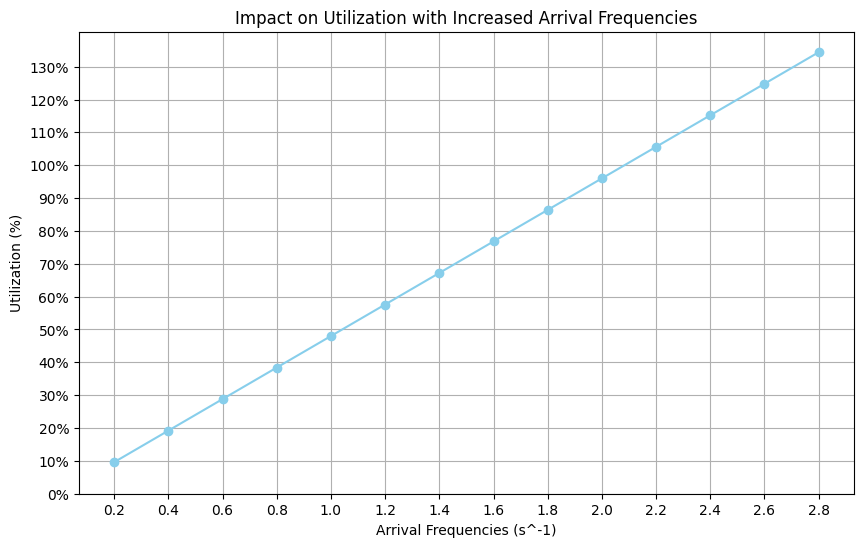

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Initial data
service_time = 0.4  # [s]

service_time_megacore = 0.08  # [s]
service_time_megacore_web = 0.4  # [s]

# Define a range of increased arrival rates from 0.6 to 2.8
increased_arrival_rates = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8]  # [s^-1]

# Calculate utilizations for the increased arrival rates
utilizations = [arrival_rate * service_time for arrival_rate in increased_arrival_rates]
combined_utilizations = [(rate * (service_time_megacore + service_time_megacore_web)) for rate in increased_arrival_rates]


# Create a DataFrame to store the results
df_impact = pd.DataFrame({
    'Arrival Rate (s^-1)': increased_arrival_rates,
    'Utilization (ρ)': combined_utilizations
})

# Plotting the impact of increased arrival rates
plt.figure(figsize=(10, 6))

# Utilization plot
plt.plot(increased_arrival_rates, combined_utilizations, marker='o', color='skyblue')
plt.xticks(increased_arrival_rates)  # Set x-axis ticks to match increased arrival rates
plt.yticks([i * 0.1 for i in range(14)], [f'{i*10}%' for i in range(14)])  # Set y-axis ticks to 10% intervals
plt.xlabel('Arrival Frequencies (s^-1)')
plt.ylabel('Utilization (%)')
plt.title('Impact on Utilization with Increased Arrival Frequencies')
plt.grid(True)

# Display the plot
plt.show()


MegaCore Services:
    Arrival Rate (s^-1)  Combined Utilization (ρ)  \
0                   0.2                     0.096   
1                   0.4                     0.192   
2                   0.6                     0.288   
3                   0.8                     0.384   
4                   1.0                     0.480   
5                   1.2                     0.576   
6                   1.4                     0.672   
7                   1.6                     0.768   
8                   1.8                     0.864   
9                   2.0                     0.960   
10                  2.2                     1.056   
11                  2.4                     1.152   
12                  2.6                     1.248   
13                  2.8                     1.344   

    Response Time MegaCore Services (s)  
0                              0.088496  
1                              0.099010  
2                              0.112360  
3                

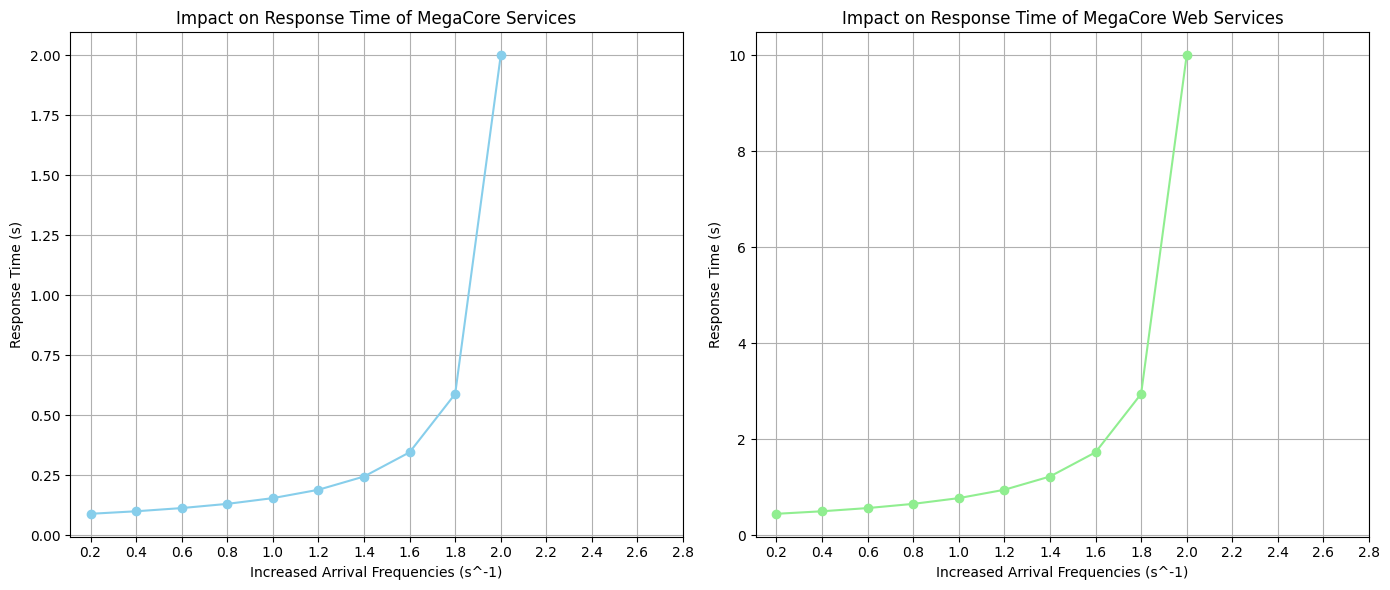

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define service times for MegaCore Services and MegaCore Web Services
service_time_megacore = 0.08  # [s]
service_time_megacore_web = 0.4  # [s]

# Define a range of increased arrival rates from 0.6 to 2.8 for both services
increased_arrival_rates = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8]  # [s^-1]

# Calculate combined utilizations for the increased arrival rates
combined_utilizations = [(arrival_rate * service_time_megacore + arrival_rate * service_time_megacore_web) for arrival_rate in increased_arrival_rates]

# Calculate response times for MegaCore Services and MegaCore Web Services
response_times_megacore = [service_time_megacore / (1 - utilization) if utilization < 1 else float('inf') for utilization in combined_utilizations]
response_times_megacore_web = [service_time_megacore_web / (1 - utilization) if utilization < 1 else float('inf') for utilization in combined_utilizations]

# Create DataFrames to store the results
df_megacore = pd.DataFrame({
    'Arrival Rate (s^-1)': increased_arrival_rates,
    'Combined Utilization (ρ)': combined_utilizations,
    'Response Time MegaCore Services (s)': response_times_megacore
})

df_megacore_web = pd.DataFrame({
    'Arrival Rate (s^-1)': increased_arrival_rates,
    'Combined Utilization (ρ)': combined_utilizations,
    'Response Time MegaCore Web Services (s)': response_times_megacore_web
})

# Display the DataFrames
print("MegaCore Services:")
print(df_megacore)
print("\nMegaCore Web Services:")
print(df_megacore_web)
# Plotting the impact of increased arrival rates on response times
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Response time plot for MegaCore Services
ax1.plot(increased_arrival_rates, response_times_megacore, marker='o', color='skyblue')
ax1.set_xticks(increased_arrival_rates)  # Set x-axis ticks to match increased arrival rates
ax1.set_xlabel('Increased Arrival Frequencies (s^-1)')
ax1.set_ylabel('Response Time (s)')
ax1.set_title('Impact on Response Time of MegaCore Services')
ax1.grid(True)

# Response time plot for MegaCore Web Services
ax2.plot(increased_arrival_rates, response_times_megacore_web, marker='o', color='lightgreen')
ax2.set_xticks(increased_arrival_rates)  # Set x-axis ticks to match increased arrival rates
ax2.set_xlabel('Increased Arrival Frequencies (s^-1)')
ax2.set_ylabel('Response Time (s)')
ax2.set_title('Impact on Response Time of MegaCore Web Services')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


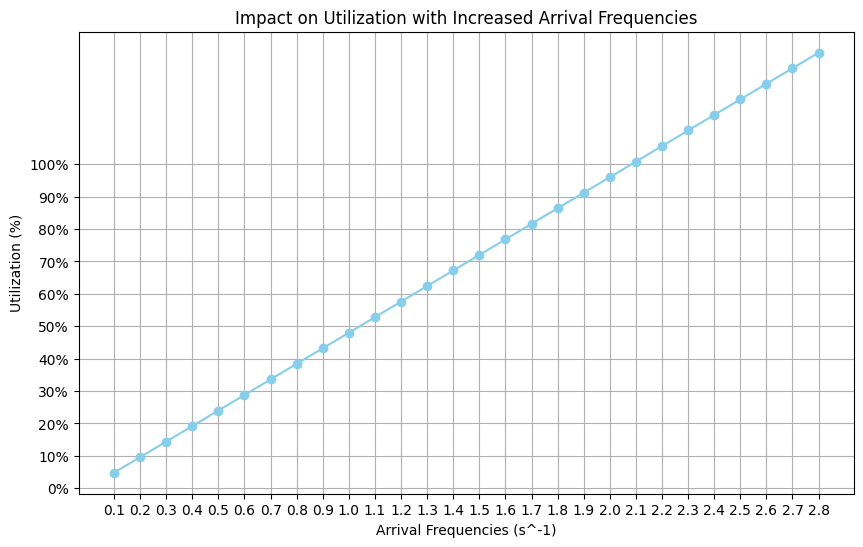

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Define service times for MegaCore Services and MegaCore Web Services
service_time_megacore = 0.08  # [s]
service_time_megacore_web = 0.4  # [s]

# Define a range of increased arrival rates from 0.6 to 2.8 for both services
increased_arrival_rates = [0.2 * i for i in range(1, 29)]  # [s^-1]

# Calculate combined utilizations for the increased arrival rates
combined_utilizations = [(rate * (service_time_megacore + service_time_megacore_web)) for rate in increased_arrival_rates]

# Create DataFrame to store the results
df_utilization = pd.DataFrame({
    'Ankunftsrate (s^-1)': increased_arrival_rates,
    'Kombinierte Auslastung (ρ)': combined_utilizations
})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(increased_arrival_rates, combined_utilizations, marker='o', color='skyblue')
plt.xticks(increased_arrival_rates)  # Set x-axis ticks to match increased arrival rates
plt.yticks([i * 0.1 for i in range(11)], [f'{i*10}%' for i in range(11)])  # Set y-axis ticks to 10% intervals
plt.xlabel('Arrival Frequencies (s^-1)')
plt.ylabel('Utilization (%)')
plt.title('Impact on Utilization with Increased Arrival Frequencies')
plt.grid(True)

# Show the plot
plt.show()
